# DS160_Final_Project_JRH_BJT

# File Name: DS160_Final_Project_JRH_BJT
## Author: Brett Tully & Jack Huff
### Python 3 
#### Class: DS-160-01
##### Semester: Spring '22

## Poker Hands Data Set

##### Each row contains 10 numerical values and 1 ordinal value. Each row represents a poker hand consisting of 5 cards randomly drawn from a standard deck of 52 cards. Each card is represented by 2 columns: one denoting the rank of the card (Ace, 2, 3... Jack, Queen, King) and the other denoting the suit of the card (Hearts, Spades, Diamonds, Clubs). The order of the cards (columns 1-10) is important in determining a poker hand(column 11).
  
#### The rank of the card will be a numerical value where 1-13 represents Ace, 2, 3... Jack, Queen, King
#### The suit of each card will be a numericl value where 1-4 represents Hearts, Spades, Diamonds, Clubs

#### The final column is the poker hand. It will be a Ordinal value where 0-9 represents:
   ######   0: Nothing in hand; not a recognized poker hand 
   ######   1: One pair; one pair of equal ranks within five cards
   ######   2: Two pairs; two pairs of equal ranks within five cards
   ######   3: Three of a kind; three equal ranks within five cards
   ######   4: Straight; five cards, sequentially ranked with no gaps
   ######   5: Flush; five cards with the same suit
   ######   6: Full house; pair + different rank three of a kind
   ######   7: Four of a kind; four equal ranks within five cards
   ######   8: Straight flush; straight + flush
   ######   9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC


from sklearn import tree
from sklearn.tree import export_text
import graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [97]:
# reading the data files
poker_train = pd.read_csv('poker-hand-training-true.data', header=None)
poker_test = pd.read_csv('poker-hand-testing.data', header=None)

In [98]:
poker_train.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

#### It appears that our data set does not have columns names. Each column represents a suit and rank of a specific card, and the last column represents the type of poker hand. We need to assign proper column names. 

In [99]:
colnames = ['Suit of Card #1', 'Rank of Card #1',
       'Suit of Card #2', 'Rank of Card #2',
       'Suit of Card #3', 'Rank of Card #3', 
       'Suit of Card #4', 'Rank of Card #4',
       'Suit of Card #5', 'Rank of Card #5', 'Poker Hand'
      ]

#### Defining what our columns will be named: this is based off what each number represents in our data. 

In [100]:
poker_test.columns = colnames
poker_train.columns = colnames

#### Assinging the new column names to our datasets

In [101]:
poker_train.head()

,Suit of Card #1,Rank of Card #1,Suit of Card #2,Rank of Card #2,Suit of Card #3,Rank of Card #3,Suit of Card #4,Rank of Card #4,Suit of Card #5,Rank of Card #5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


#### Checking to make sure that our column names were applied correctly. Looks good 

In [102]:
poker_train.shape

(25010, 11)

#### Checking how many rows and columns we have in the training set. The description of the data says we should have 25,010 instances. Looks good

In [103]:
poker_test.shape

(1000000, 11)

#### Again, checking how many rows and columns we have. The description of the data says we should have 1,000,000 instances in this set. Looks good

In [104]:
poker_train['Poker Hand'].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
Name: Poker Hand, dtype: int64

#### Checking how many times each specific poker hand occurs in the training set

In [105]:
poker_test['Poker Hand'].value_counts()

0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: Poker Hand, dtype: int64

#### Checking how many times each specific poker hand occurs in the test set. Note that there are more royal flushs(9) in the training set than the test set, even though the test set contains 1,000,000 samples compared to the training set having 25,010

##### the description of our data tells us that in the training set, "The Straight flush and Royal flush hands are not as representative of the true domain because they have been over-sampled. The Straight flush is 14.43 times more likely to occur in the training set, while the Royal flush is 129.82 times more likely."

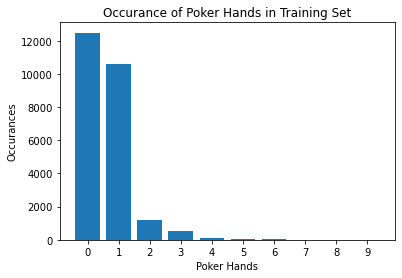

In [106]:
hands = ['0','1','2','3','4','5','6','7','8','9']
instances = [12493, 10599, 1206, 513, 93, 54, 36, 6, 5, 5]

plt.bar(hands,instances)
plt.title('Occurance of Poker Hands in Training Set')
plt.xlabel('Poker Hands')
plt.ylabel('Occurances')
plt.show()

#### a quick bar chart of the training set shows us that the distribution of poker hands is clearly disproportionate with nothing in hand(0) and one pair(1) being the most common by far

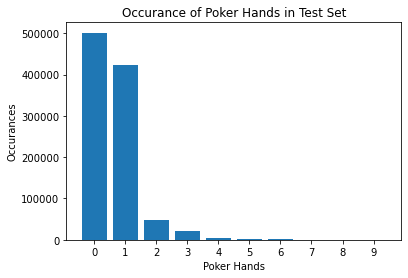

In [107]:
hands = ['0','1','2','3','4','5','6','7','8','9']
instances = [501209, 422498, 47622, 21121, 3885, 1996, 1424, 230, 12, 3]

plt.bar(hands,instances)
plt.title('Occurance of Poker Hands in Test Set')
plt.xlabel('Poker Hands')
plt.ylabel('Occurances')
plt.show()

#### A bar chart of the test data shows us that the distribution of the training set and test set are similar. It appears that neither have a linear distribution.

### Probability of each Poker Hand in each data set

In [108]:
poker_train['Poker Hand'].value_counts() / len(poker_train)

0    0.499520
1    0.423790
2    0.048221
3    0.020512
4    0.003719
5    0.002159
6    0.001439
7    0.000240
8    0.000200
9    0.000200
Name: Poker Hand, dtype: float64

In [109]:
poker_test['Poker Hand'].value_counts() / len(poker_test)

0    0.501209
1    0.422498
2    0.047622
3    0.021121
4    0.003885
5    0.001996
6    0.001424
7    0.000230
8    0.000012
9    0.000003
Name: Poker Hand, dtype: float64

#### Once again, this shows us that the training set has a good representation of the data besides the royal flush(9) and straight flush(8).

In [110]:
poker_train.groupby('Poker Hand').size()

Poker Hand
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
dtype: int64

## Creating a Confusion Matrix

In [111]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

## Seperating the Poker Hands from the Suits and the Ranks from both the training set and testing set

In [112]:
X_train = (poker_train.iloc[:,:-1])
y_train = poker_train['Poker Hand']

X_test = poker_test.iloc[:,:-1]
y_test = poker_test['Poker Hand']

## Decision Tree #1

In [113]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=11,splitter = 'best')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64    563322
           1       0.50      0.51      0.50    416905
           2       0.04      0.15      0.06     12549
           3       0.05      0.19      0.08      5452
           4       0.01      0.05      0.02       679
           5       0.01      0.03      0.02       798
           6       0.01      0.06      0.01       159
           7       0.00      0.05      0.01        19
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        33

    accuracy                           0.55   1000000
   macro avg       0.13      0.16      0.13   1000000
weighted avg       0.59      0.55      0.57   1000000



## Decision Tree #2

In [114]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=11,splitter = 'best')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))

/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.62      0.57      0.59    544720
           1       0.49      0.47      0.48    437738
           2       0.03      0.15      0.06     11217
           3       0.03      0.13      0.05      4817
           4       0.01      0.05      0.01       484
           5       0.19      0.74      0.30       505
           6       0.01      0.02      0.01       376
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        90
           9       0.00      0.00      0.00        53

    accuracy                           0.52   1000000
   macro avg       0.14      0.21      0.15   1000000
weighted avg       0.55      0.52      0.53   1000000



/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


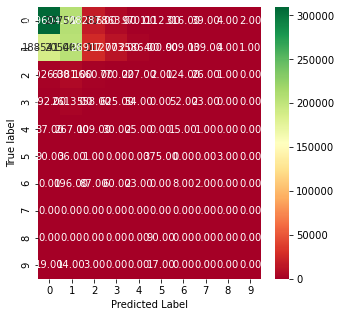

In [115]:
plot_cm(y_pred, y_test)

## Decision Tree #3

In [116]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=11,min_samples_leaf=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64    563171
           1       0.50      0.51      0.50    416429
           2       0.04      0.15      0.06     13222
           3       0.05      0.20      0.08      5407
           4       0.01      0.06      0.02       700
           5       0.02      0.05      0.02       747
           6       0.00      0.02      0.01       161
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00       103
           9       0.00      0.00      0.00        33

    accuracy                           0.55   1000000
   macro avg       0.13      0.16      0.13   1000000
weighted avg       0.59      0.55      0.57   1000000



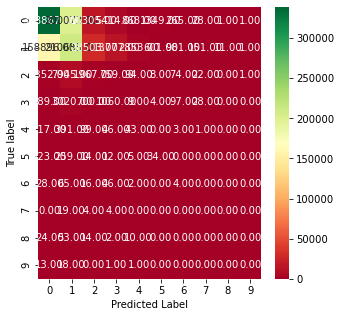

In [117]:
plot_cm(y_pred, y_test)

## Random Forest Classifier #1

In [118]:
clf = RandomForestClassifier(criterion='entropy')
clf.fit(X_train,np.ravel(y_train))
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))

/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      0.64      0.71    637557
           1       0.49      0.57      0.53    361526
           2       0.01      0.37      0.01       691
           3       0.00      0.53      0.01       188
           4       0.00      0.21      0.00        24
           5       0.01      0.92      0.01        13
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.61   1000000
   macro avg       0.13      0.32      0.13   1000000
weighted avg       0.69      0.61      0.65   1000000



/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
set(y_test) - set(y_pred)

{7, 8, 9}

## Random Forest Classifier #2

In [120]:
model = RandomForestClassifier(n_estimators = 800,criterion = 'entropy',bootstrap=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy score ',accuracy_score(y_test,predictions))
print(classification_report(predictions,y_test))

Accuracy score  0.621928


/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      0.64      0.72    644747
           1       0.49      0.59      0.54    354612
           2       0.00      0.39      0.01       483
           3       0.00      0.47      0.01       126
           4       0.00      0.25      0.00        16
           5       0.01      1.00      0.01        15
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.62   1000000
   macro avg       0.13      0.33      0.13   1000000
weighted avg       0.71      0.62      0.66   1000000



/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier #3

In [121]:
model = RandomForestClassifier(n_estimators = 800,criterion='gini',bootstrap=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy score ',accuracy_score(y_test,predictions))
print(classification_report(predictions,y_test))

Accuracy score  0.624438


/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      0.64      0.72    641202
           1       0.50      0.59      0.54    358306
           2       0.00      0.42      0.01       390
           3       0.00      0.54      0.00        80
           4       0.00      0.20      0.00        15
           5       0.00      1.00      0.01         7
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.62   1000000
   macro avg       0.13      0.34      0.13   1000000
weighted avg       0.71      0.62      0.66   1000000



/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier #4

In [122]:
model = RandomForestClassifier(n_estimators = 600,criterion='gini',bootstrap=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy score ',accuracy_score(y_test,predictions))
print(classification_report(predictions,y_test))

Accuracy score  0.624922


/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      0.65      0.72    641202
           1       0.50      0.59      0.54    358321
           2       0.00      0.42      0.01       367
           3       0.00      0.57      0.00        89
           4       0.00      0.23      0.00        13
           5       0.00      1.00      0.01         7
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.62   1000000
   macro avg       0.13      0.35      0.13   1000000
weighted avg       0.71      0.62      0.66   1000000



/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
